In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense

2022-04-18 20:27:30.685255: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-18 20:27:30.685303: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
data=pd.read_excel("./Au.xlsx")

In [3]:
# 划分输入和输出
x = []
for col in data.columns:
    if col not in ['CO Faradaic efficiency/ %','Current Density','Catalyst']:
        x.append(col)
x = np.array(data[x])
y = data['CO Faradaic efficiency/ %']

In [4]:
# 按照属性标号处理名词性属性
x = x.T
for i in range(x.shape[0]):
    x[i] = LabelEncoder().fit_transform(x[i])
x = x.T

In [5]:
# 数据预处理
scaler1 = StandardScaler()
x = scaler1.fit_transform(x)
scaler2 = StandardScaler()
y = scaler2.fit_transform(np.array([y]).T)

In [6]:
# 数据集划分
train_x, test_x, train_y, test_y = train_test_split(x, y,train_size=0.8)

In [7]:
# 创建一个ANN对象
classifier = Sequential()
# 输入层
classifier.add(Dense(units=8, kernel_initializer='normal', activation='relu', input_dim=10))
# 隐含层
classifier.add(Dense(units=10, kernel_initializer='normal', activation='relu'))
# 输出层
classifier.add(Dense(units=1, kernel_initializer='normal'))
# 设置优化
classifier.compile(optimizer='sgd', loss='mse', metrics=['mae'])

In [8]:
# 训练ANN
history = classifier.fit(train_x, train_y, epochs=2000, batch_size=2, validation_data=(test_x,test_y),verbose=2)


Train on 57 samples, validate on 15 samples
Epoch 1/2000
 - 1s - loss: 0.9885 - mae: 0.8708 - val_loss: 1.0795 - val_mae: 0.8991
Epoch 2/2000
 - 0s - loss: 0.9877 - mae: 0.8693 - val_loss: 1.0785 - val_mae: 0.8977
Epoch 3/2000
 - 0s - loss: 0.9881 - mae: 0.8704 - val_loss: 1.0786 - val_mae: 0.8980
Epoch 4/2000
 - 0s - loss: 0.9864 - mae: 0.8694 - val_loss: 1.0785 - val_mae: 0.8980
Epoch 5/2000
 - 0s - loss: 0.9890 - mae: 0.8685 - val_loss: 1.0790 - val_mae: 0.8988
Epoch 6/2000
 - 0s - loss: 0.9905 - mae: 0.8679 - val_loss: 1.0785 - val_mae: 0.8981
Epoch 7/2000
 - 0s - loss: 0.9870 - mae: 0.8685 - val_loss: 1.0780 - val_mae: 0.8968
Epoch 8/2000
 - 0s - loss: 0.9896 - mae: 0.8733 - val_loss: 1.0789 - val_mae: 0.8990
Epoch 9/2000
 - 0s - loss: 0.9894 - mae: 0.8701 - val_loss: 1.0788 - val_mae: 0.8988
Epoch 10/2000
 - 0s - loss: 0.9860 - mae: 0.8663 - val_loss: 1.0784 - val_mae: 0.8984
Epoch 11/2000
 - 0s - loss: 0.9862 - mae: 0.8682 - val_loss: 1.0789 - val_mae: 0.8991
Epoch 12/2000
 - 0

Epoch 94/2000
 - 0s - loss: 0.6936 - mae: 0.7216 - val_loss: 0.7968 - val_mae: 0.7361
Epoch 95/2000
 - 0s - loss: 0.6667 - mae: 0.6969 - val_loss: 0.7135 - val_mae: 0.7094
Epoch 96/2000
 - 0s - loss: 0.6501 - mae: 0.6830 - val_loss: 0.7302 - val_mae: 0.7198
Epoch 97/2000
 - 0s - loss: 0.6501 - mae: 0.6831 - val_loss: 0.7186 - val_mae: 0.7104
Epoch 98/2000
 - 0s - loss: 0.6198 - mae: 0.6679 - val_loss: 0.7420 - val_mae: 0.7101
Epoch 99/2000
 - 0s - loss: 0.6281 - mae: 0.6816 - val_loss: 0.7445 - val_mae: 0.7144
Epoch 100/2000
 - 0s - loss: 0.6069 - mae: 0.6466 - val_loss: 0.7435 - val_mae: 0.7175
Epoch 101/2000
 - 0s - loss: 0.5876 - mae: 0.6403 - val_loss: 0.7331 - val_mae: 0.7180
Epoch 102/2000
 - 0s - loss: 0.6059 - mae: 0.6598 - val_loss: 0.7083 - val_mae: 0.7302
Epoch 103/2000
 - 0s - loss: 0.5676 - mae: 0.6313 - val_loss: 0.7307 - val_mae: 0.7139
Epoch 104/2000
 - 0s - loss: 0.5696 - mae: 0.6282 - val_loss: 0.6996 - val_mae: 0.7084
Epoch 105/2000
 - 0s - loss: 0.5421 - mae: 0.6088

Epoch 189/2000
 - 0s - loss: 0.2760 - mae: 0.3821 - val_loss: 0.6924 - val_mae: 0.5712
Epoch 190/2000
 - 0s - loss: 0.2820 - mae: 0.4021 - val_loss: 0.7450 - val_mae: 0.6048
Epoch 191/2000
 - 0s - loss: 0.2738 - mae: 0.3954 - val_loss: 0.8073 - val_mae: 0.6179
Epoch 192/2000
 - 0s - loss: 0.2678 - mae: 0.3771 - val_loss: 0.6556 - val_mae: 0.5457
Epoch 193/2000
 - 0s - loss: 0.2652 - mae: 0.3978 - val_loss: 1.0285 - val_mae: 0.6752
Epoch 194/2000
 - 0s - loss: 0.3081 - mae: 0.4030 - val_loss: 0.8825 - val_mae: 0.6538
Epoch 195/2000
 - 0s - loss: 0.3089 - mae: 0.4341 - val_loss: 0.7136 - val_mae: 0.5793
Epoch 196/2000
 - 0s - loss: 0.2642 - mae: 0.3781 - val_loss: 0.8775 - val_mae: 0.6714
Epoch 197/2000
 - 0s - loss: 0.2817 - mae: 0.4092 - val_loss: 0.7613 - val_mae: 0.6036
Epoch 198/2000
 - 0s - loss: 0.2909 - mae: 0.4081 - val_loss: 0.8605 - val_mae: 0.6048
Epoch 199/2000
 - 0s - loss: 0.2741 - mae: 0.3896 - val_loss: 0.7511 - val_mae: 0.5851
Epoch 200/2000
 - 0s - loss: 0.2568 - mae: 

 - 0s - loss: 0.2190 - mae: 0.3192 - val_loss: 0.8739 - val_mae: 0.5950
Epoch 284/2000
 - 0s - loss: 0.2360 - mae: 0.3373 - val_loss: 0.8512 - val_mae: 0.6123
Epoch 285/2000
 - 0s - loss: 0.2243 - mae: 0.3347 - val_loss: 0.8938 - val_mae: 0.6435
Epoch 286/2000
 - 0s - loss: 0.2347 - mae: 0.3389 - val_loss: 0.8178 - val_mae: 0.5934
Epoch 287/2000
 - 0s - loss: 0.2129 - mae: 0.3135 - val_loss: 0.8770 - val_mae: 0.6158
Epoch 288/2000
 - 0s - loss: 0.2375 - mae: 0.3396 - val_loss: 0.8581 - val_mae: 0.5984
Epoch 289/2000
 - 0s - loss: 0.2144 - mae: 0.3138 - val_loss: 0.8555 - val_mae: 0.6106
Epoch 290/2000
 - 0s - loss: 0.2223 - mae: 0.3196 - val_loss: 0.8722 - val_mae: 0.6203
Epoch 291/2000
 - 0s - loss: 0.2473 - mae: 0.3620 - val_loss: 0.8386 - val_mae: 0.6004
Epoch 292/2000
 - 0s - loss: 0.2113 - mae: 0.3214 - val_loss: 0.9931 - val_mae: 0.7114
Epoch 293/2000
 - 0s - loss: 0.2162 - mae: 0.3100 - val_loss: 0.9856 - val_mae: 0.6908
Epoch 294/2000
 - 0s - loss: 0.2199 - mae: 0.3238 - val_lo

Epoch 378/2000
 - 0s - loss: 0.1873 - mae: 0.2902 - val_loss: 0.9095 - val_mae: 0.6824
Epoch 379/2000
 - 0s - loss: 0.1857 - mae: 0.2872 - val_loss: 0.8338 - val_mae: 0.6064
Epoch 380/2000
 - 0s - loss: 0.1820 - mae: 0.2848 - val_loss: 1.0011 - val_mae: 0.7577
Epoch 381/2000
 - 0s - loss: 0.1872 - mae: 0.2939 - val_loss: 0.8767 - val_mae: 0.6247
Epoch 382/2000
 - 0s - loss: 0.1784 - mae: 0.2794 - val_loss: 0.9980 - val_mae: 0.7138
Epoch 383/2000
 - 0s - loss: 0.1941 - mae: 0.3037 - val_loss: 0.8627 - val_mae: 0.6096
Epoch 384/2000
 - 0s - loss: 0.1925 - mae: 0.2953 - val_loss: 0.7710 - val_mae: 0.5579
Epoch 385/2000
 - 0s - loss: 0.1885 - mae: 0.2992 - val_loss: 0.8778 - val_mae: 0.6344
Epoch 386/2000
 - 0s - loss: 0.1826 - mae: 0.2882 - val_loss: 0.7524 - val_mae: 0.5854
Epoch 387/2000
 - 0s - loss: 0.1867 - mae: 0.2982 - val_loss: 0.9652 - val_mae: 0.6886
Epoch 388/2000
 - 0s - loss: 0.1906 - mae: 0.2943 - val_loss: 0.8928 - val_mae: 0.6479
Epoch 389/2000
 - 0s - loss: 0.1857 - mae: 

 - 0s - loss: 0.1793 - mae: 0.2869 - val_loss: 0.9349 - val_mae: 0.6760
Epoch 473/2000
 - 0s - loss: 0.1743 - mae: 0.2867 - val_loss: 1.0442 - val_mae: 0.7473
Epoch 474/2000
 - 0s - loss: 0.1669 - mae: 0.2708 - val_loss: 0.9444 - val_mae: 0.6750
Epoch 475/2000
 - 0s - loss: 0.1630 - mae: 0.2709 - val_loss: 0.8365 - val_mae: 0.5937
Epoch 476/2000
 - 0s - loss: 0.1766 - mae: 0.2758 - val_loss: 0.9409 - val_mae: 0.6929
Epoch 477/2000
 - 0s - loss: 0.1742 - mae: 0.2707 - val_loss: 0.9901 - val_mae: 0.7093
Epoch 478/2000
 - 0s - loss: 0.1683 - mae: 0.2644 - val_loss: 1.0032 - val_mae: 0.7043
Epoch 479/2000
 - 0s - loss: 0.1794 - mae: 0.2691 - val_loss: 0.9408 - val_mae: 0.6824
Epoch 480/2000
 - 0s - loss: 0.1632 - mae: 0.2558 - val_loss: 0.9534 - val_mae: 0.6902
Epoch 481/2000
 - 0s - loss: 0.1705 - mae: 0.2665 - val_loss: 0.6993 - val_mae: 0.5693
Epoch 482/2000
 - 0s - loss: 0.1731 - mae: 0.2782 - val_loss: 0.9544 - val_mae: 0.6974
Epoch 483/2000
 - 0s - loss: 0.1668 - mae: 0.2774 - val_lo

Epoch 567/2000
 - 0s - loss: 0.1488 - mae: 0.2366 - val_loss: 0.9891 - val_mae: 0.7091
Epoch 568/2000
 - 0s - loss: 0.1522 - mae: 0.2465 - val_loss: 0.9083 - val_mae: 0.6762
Epoch 569/2000
 - 0s - loss: 0.1590 - mae: 0.2559 - val_loss: 0.9785 - val_mae: 0.6848
Epoch 570/2000
 - 0s - loss: 0.1514 - mae: 0.2492 - val_loss: 0.9123 - val_mae: 0.6565
Epoch 571/2000
 - 0s - loss: 0.1583 - mae: 0.2554 - val_loss: 0.9506 - val_mae: 0.6974
Epoch 572/2000
 - 0s - loss: 0.1560 - mae: 0.2404 - val_loss: 0.9977 - val_mae: 0.6994
Epoch 573/2000
 - 0s - loss: 0.1664 - mae: 0.2757 - val_loss: 1.0854 - val_mae: 0.7472
Epoch 574/2000
 - 0s - loss: 0.1585 - mae: 0.2561 - val_loss: 0.9570 - val_mae: 0.6839
Epoch 575/2000
 - 0s - loss: 0.1586 - mae: 0.2575 - val_loss: 1.0133 - val_mae: 0.7225
Epoch 576/2000
 - 0s - loss: 0.1540 - mae: 0.2564 - val_loss: 1.0089 - val_mae: 0.7111
Epoch 577/2000
 - 0s - loss: 0.1510 - mae: 0.2410 - val_loss: 1.0580 - val_mae: 0.7747
Epoch 578/2000
 - 0s - loss: 0.1532 - mae: 

 - 0s - loss: 0.1482 - mae: 0.2324 - val_loss: 1.2059 - val_mae: 0.7999
Epoch 662/2000
 - 0s - loss: 0.1588 - mae: 0.2617 - val_loss: 1.1071 - val_mae: 0.7543
Epoch 663/2000
 - 0s - loss: 0.1447 - mae: 0.2353 - val_loss: 0.9658 - val_mae: 0.6875
Epoch 664/2000
 - 0s - loss: 0.1425 - mae: 0.2394 - val_loss: 1.2098 - val_mae: 0.8113
Epoch 665/2000
 - 0s - loss: 0.1538 - mae: 0.2550 - val_loss: 1.3795 - val_mae: 0.8906
Epoch 666/2000
 - 0s - loss: 0.1517 - mae: 0.2485 - val_loss: 1.0592 - val_mae: 0.7371
Epoch 667/2000
 - 0s - loss: 0.1509 - mae: 0.2491 - val_loss: 1.3688 - val_mae: 0.8588
Epoch 668/2000
 - 0s - loss: 0.1535 - mae: 0.2535 - val_loss: 0.9542 - val_mae: 0.7008
Epoch 669/2000
 - 0s - loss: 0.1713 - mae: 0.2713 - val_loss: 1.1050 - val_mae: 0.7715
Epoch 670/2000
 - 0s - loss: 0.1556 - mae: 0.2538 - val_loss: 0.9226 - val_mae: 0.6594
Epoch 671/2000
 - 0s - loss: 0.1486 - mae: 0.2417 - val_loss: 1.2566 - val_mae: 0.8535
Epoch 672/2000
 - 0s - loss: 0.1560 - mae: 0.2506 - val_lo

Epoch 756/2000
 - 0s - loss: 0.1430 - mae: 0.2362 - val_loss: 0.9493 - val_mae: 0.6917
Epoch 757/2000
 - 0s - loss: 0.1470 - mae: 0.2421 - val_loss: 1.0466 - val_mae: 0.7123
Epoch 758/2000
 - 0s - loss: 0.1481 - mae: 0.2343 - val_loss: 0.9768 - val_mae: 0.7075
Epoch 759/2000
 - 0s - loss: 0.1408 - mae: 0.2281 - val_loss: 1.0975 - val_mae: 0.7484
Epoch 760/2000
 - 0s - loss: 0.1377 - mae: 0.2247 - val_loss: 1.1432 - val_mae: 0.7788
Epoch 761/2000
 - 0s - loss: 0.1421 - mae: 0.2227 - val_loss: 1.1245 - val_mae: 0.7659
Epoch 762/2000
 - 0s - loss: 0.1466 - mae: 0.2378 - val_loss: 1.2231 - val_mae: 0.8168
Epoch 763/2000
 - 0s - loss: 0.1454 - mae: 0.2383 - val_loss: 1.0958 - val_mae: 0.7653
Epoch 764/2000
 - 0s - loss: 0.1487 - mae: 0.2478 - val_loss: 1.2269 - val_mae: 0.8328
Epoch 765/2000
 - 0s - loss: 0.1429 - mae: 0.2332 - val_loss: 0.8797 - val_mae: 0.6416
Epoch 766/2000
 - 0s - loss: 0.1540 - mae: 0.2573 - val_loss: 1.1536 - val_mae: 0.7842
Epoch 767/2000
 - 0s - loss: 0.1590 - mae: 

 - 0s - loss: 0.1490 - mae: 0.2373 - val_loss: 1.0743 - val_mae: 0.7573
Epoch 851/2000
 - 0s - loss: 0.1465 - mae: 0.2387 - val_loss: 1.0814 - val_mae: 0.7427
Epoch 852/2000
 - 0s - loss: 0.1502 - mae: 0.2507 - val_loss: 1.0943 - val_mae: 0.7546
Epoch 853/2000
 - 0s - loss: 0.1517 - mae: 0.2373 - val_loss: 0.9939 - val_mae: 0.6996
Epoch 854/2000
 - 0s - loss: 0.1416 - mae: 0.2349 - val_loss: 1.0587 - val_mae: 0.7356
Epoch 855/2000
 - 0s - loss: 0.1426 - mae: 0.2342 - val_loss: 0.9956 - val_mae: 0.7070
Epoch 856/2000
 - 0s - loss: 0.1457 - mae: 0.2416 - val_loss: 1.0744 - val_mae: 0.7540
Epoch 857/2000
 - 0s - loss: 0.1419 - mae: 0.2256 - val_loss: 1.0323 - val_mae: 0.7191
Epoch 858/2000
 - 0s - loss: 0.1444 - mae: 0.2305 - val_loss: 1.0067 - val_mae: 0.7049
Epoch 859/2000
 - 0s - loss: 0.1433 - mae: 0.2383 - val_loss: 1.3172 - val_mae: 0.8612
Epoch 860/2000
 - 0s - loss: 0.1583 - mae: 0.2665 - val_loss: 1.1182 - val_mae: 0.7683
Epoch 861/2000
 - 0s - loss: 0.1427 - mae: 0.2269 - val_lo

Epoch 945/2000
 - 0s - loss: 0.1426 - mae: 0.2319 - val_loss: 1.0345 - val_mae: 0.7243
Epoch 946/2000
 - 0s - loss: 0.1443 - mae: 0.2290 - val_loss: 1.1427 - val_mae: 0.7941
Epoch 947/2000
 - 0s - loss: 0.1457 - mae: 0.2384 - val_loss: 1.1689 - val_mae: 0.7923
Epoch 948/2000
 - 0s - loss: 0.1486 - mae: 0.2398 - val_loss: 0.9691 - val_mae: 0.6971
Epoch 949/2000
 - 0s - loss: 0.1474 - mae: 0.2401 - val_loss: 1.1058 - val_mae: 0.7572
Epoch 950/2000
 - 0s - loss: 0.1472 - mae: 0.2290 - val_loss: 1.0289 - val_mae: 0.7075
Epoch 951/2000
 - 0s - loss: 0.1535 - mae: 0.2311 - val_loss: 1.0308 - val_mae: 0.7308
Epoch 952/2000
 - 0s - loss: 0.1436 - mae: 0.2278 - val_loss: 1.0807 - val_mae: 0.7304
Epoch 953/2000
 - 0s - loss: 0.1412 - mae: 0.2206 - val_loss: 0.9632 - val_mae: 0.6826
Epoch 954/2000
 - 0s - loss: 0.1474 - mae: 0.2395 - val_loss: 1.0864 - val_mae: 0.7439
Epoch 955/2000
 - 0s - loss: 0.1459 - mae: 0.2396 - val_loss: 1.1079 - val_mae: 0.7517
Epoch 956/2000
 - 0s - loss: 0.1372 - mae: 

Epoch 1039/2000
 - 0s - loss: 0.1424 - mae: 0.2299 - val_loss: 0.9954 - val_mae: 0.6927
Epoch 1040/2000
 - 0s - loss: 0.1477 - mae: 0.2452 - val_loss: 1.0631 - val_mae: 0.7370
Epoch 1041/2000
 - 0s - loss: 0.1401 - mae: 0.2269 - val_loss: 1.0956 - val_mae: 0.7523
Epoch 1042/2000
 - 0s - loss: 0.1463 - mae: 0.2443 - val_loss: 1.3720 - val_mae: 0.8757
Epoch 1043/2000
 - 0s - loss: 0.1567 - mae: 0.2602 - val_loss: 1.1248 - val_mae: 0.7820
Epoch 1044/2000
 - 0s - loss: 0.1398 - mae: 0.2266 - val_loss: 1.0659 - val_mae: 0.7298
Epoch 1045/2000
 - 0s - loss: 0.1385 - mae: 0.2287 - val_loss: 1.1101 - val_mae: 0.7683
Epoch 1046/2000
 - 0s - loss: 0.1413 - mae: 0.2285 - val_loss: 1.1447 - val_mae: 0.7652
Epoch 1047/2000
 - 0s - loss: 0.1507 - mae: 0.2396 - val_loss: 1.3087 - val_mae: 0.8427
Epoch 1048/2000
 - 0s - loss: 0.1388 - mae: 0.2237 - val_loss: 1.0576 - val_mae: 0.7285
Epoch 1049/2000
 - 0s - loss: 0.1415 - mae: 0.2296 - val_loss: 1.0964 - val_mae: 0.7454
Epoch 1050/2000
 - 0s - loss: 0.

 - 0s - loss: 0.1410 - mae: 0.2212 - val_loss: 1.0776 - val_mae: 0.7492
Epoch 1133/2000
 - 0s - loss: 0.1410 - mae: 0.2383 - val_loss: 1.0916 - val_mae: 0.7518
Epoch 1134/2000
 - 0s - loss: 0.1429 - mae: 0.2249 - val_loss: 1.2146 - val_mae: 0.8147
Epoch 1135/2000
 - 0s - loss: 0.1425 - mae: 0.2292 - val_loss: 0.9440 - val_mae: 0.6853
Epoch 1136/2000
 - 0s - loss: 0.1418 - mae: 0.2309 - val_loss: 0.9801 - val_mae: 0.6900
Epoch 1137/2000
 - 0s - loss: 0.1427 - mae: 0.2297 - val_loss: 0.9680 - val_mae: 0.6978
Epoch 1138/2000
 - 0s - loss: 0.1444 - mae: 0.2309 - val_loss: 1.1763 - val_mae: 0.8115
Epoch 1139/2000
 - 0s - loss: 0.1403 - mae: 0.2308 - val_loss: 1.0078 - val_mae: 0.7140
Epoch 1140/2000
 - 0s - loss: 0.1442 - mae: 0.2333 - val_loss: 1.0424 - val_mae: 0.7431
Epoch 1141/2000
 - 0s - loss: 0.1513 - mae: 0.2424 - val_loss: 1.0450 - val_mae: 0.7295
Epoch 1142/2000
 - 0s - loss: 0.1421 - mae: 0.2299 - val_loss: 1.1702 - val_mae: 0.8003
Epoch 1143/2000
 - 0s - loss: 0.1395 - mae: 0.22

Epoch 1226/2000
 - 0s - loss: 0.1418 - mae: 0.2303 - val_loss: 1.0064 - val_mae: 0.7292
Epoch 1227/2000
 - 0s - loss: 0.1363 - mae: 0.2142 - val_loss: 1.0484 - val_mae: 0.7424
Epoch 1228/2000
 - 0s - loss: 0.1468 - mae: 0.2383 - val_loss: 1.0061 - val_mae: 0.7361
Epoch 1229/2000
 - 0s - loss: 0.1380 - mae: 0.2282 - val_loss: 1.1891 - val_mae: 0.8292
Epoch 1230/2000
 - 0s - loss: 0.1431 - mae: 0.2336 - val_loss: 0.9411 - val_mae: 0.7056
Epoch 1231/2000
 - 0s - loss: 0.1412 - mae: 0.2329 - val_loss: 1.1697 - val_mae: 0.8343
Epoch 1232/2000
 - 0s - loss: 0.1384 - mae: 0.2169 - val_loss: 0.7537 - val_mae: 0.6174
Epoch 1233/2000
 - 0s - loss: 0.1426 - mae: 0.2288 - val_loss: 1.1224 - val_mae: 0.7840
Epoch 1234/2000
 - 0s - loss: 0.1396 - mae: 0.2331 - val_loss: 1.2176 - val_mae: 0.8278
Epoch 1235/2000
 - 0s - loss: 0.1371 - mae: 0.2249 - val_loss: 1.1239 - val_mae: 0.8033
Epoch 1236/2000
 - 0s - loss: 0.1388 - mae: 0.2259 - val_loss: 1.1214 - val_mae: 0.7951
Epoch 1237/2000
 - 0s - loss: 0.

 - 0s - loss: 0.1412 - mae: 0.2235 - val_loss: 1.1081 - val_mae: 0.7700
Epoch 1320/2000
 - 0s - loss: 0.1402 - mae: 0.2240 - val_loss: 1.0794 - val_mae: 0.7488
Epoch 1321/2000
 - 0s - loss: 0.1416 - mae: 0.2243 - val_loss: 0.9824 - val_mae: 0.7060
Epoch 1322/2000
 - 0s - loss: 0.1375 - mae: 0.2200 - val_loss: 1.0276 - val_mae: 0.7266
Epoch 1323/2000
 - 0s - loss: 0.1439 - mae: 0.2309 - val_loss: 1.0707 - val_mae: 0.7490
Epoch 1324/2000
 - 0s - loss: 0.1386 - mae: 0.2264 - val_loss: 1.0948 - val_mae: 0.7541
Epoch 1325/2000
 - 0s - loss: 0.1399 - mae: 0.2247 - val_loss: 0.9240 - val_mae: 0.6747
Epoch 1326/2000
 - 0s - loss: 0.1373 - mae: 0.2202 - val_loss: 1.0851 - val_mae: 0.7605
Epoch 1327/2000
 - 0s - loss: 0.1386 - mae: 0.2261 - val_loss: 1.1868 - val_mae: 0.8109
Epoch 1328/2000
 - 0s - loss: 0.1439 - mae: 0.2346 - val_loss: 1.0200 - val_mae: 0.7155
Epoch 1329/2000
 - 0s - loss: 0.1456 - mae: 0.2363 - val_loss: 1.2108 - val_mae: 0.8265
Epoch 1330/2000
 - 0s - loss: 0.1396 - mae: 0.22

Epoch 1413/2000
 - 0s - loss: 0.1426 - mae: 0.2305 - val_loss: 1.0090 - val_mae: 0.7135
Epoch 1414/2000
 - 0s - loss: 0.1381 - mae: 0.2203 - val_loss: 0.8756 - val_mae: 0.6668
Epoch 1415/2000
 - 0s - loss: 0.1409 - mae: 0.2267 - val_loss: 0.9610 - val_mae: 0.7082
Epoch 1416/2000
 - 0s - loss: 0.1388 - mae: 0.2275 - val_loss: 1.1101 - val_mae: 0.7598
Epoch 1417/2000
 - 0s - loss: 0.1400 - mae: 0.2275 - val_loss: 0.9151 - val_mae: 0.6672
Epoch 1418/2000
 - 0s - loss: 0.1388 - mae: 0.2232 - val_loss: 1.0551 - val_mae: 0.7330
Epoch 1419/2000
 - 0s - loss: 0.1421 - mae: 0.2251 - val_loss: 1.0897 - val_mae: 0.7601
Epoch 1420/2000
 - 0s - loss: 0.1318 - mae: 0.2079 - val_loss: 0.8689 - val_mae: 0.6643
Epoch 1421/2000
 - 0s - loss: 0.1421 - mae: 0.2308 - val_loss: 1.0712 - val_mae: 0.7590
Epoch 1422/2000
 - 0s - loss: 0.1390 - mae: 0.2180 - val_loss: 1.0263 - val_mae: 0.7191
Epoch 1423/2000
 - 0s - loss: 0.1385 - mae: 0.2219 - val_loss: 1.1085 - val_mae: 0.7530
Epoch 1424/2000
 - 0s - loss: 0.

 - 0s - loss: 0.1383 - mae: 0.2128 - val_loss: 0.9562 - val_mae: 0.6880
Epoch 1507/2000
 - 0s - loss: 0.1407 - mae: 0.2262 - val_loss: 1.1167 - val_mae: 0.7677
Epoch 1508/2000
 - 0s - loss: 0.1445 - mae: 0.2368 - val_loss: 1.0493 - val_mae: 0.7331
Epoch 1509/2000
 - 0s - loss: 0.1396 - mae: 0.2200 - val_loss: 1.1219 - val_mae: 0.7740
Epoch 1510/2000
 - 0s - loss: 0.1365 - mae: 0.2208 - val_loss: 0.9846 - val_mae: 0.7129
Epoch 1511/2000
 - 0s - loss: 0.1420 - mae: 0.2234 - val_loss: 1.0170 - val_mae: 0.7132
Epoch 1512/2000
 - 0s - loss: 0.1346 - mae: 0.2183 - val_loss: 1.0918 - val_mae: 0.7650
Epoch 1513/2000
 - 0s - loss: 0.1412 - mae: 0.2285 - val_loss: 1.0515 - val_mae: 0.7282
Epoch 1514/2000
 - 0s - loss: 0.1440 - mae: 0.2373 - val_loss: 1.3324 - val_mae: 0.8851
Epoch 1515/2000
 - 0s - loss: 0.1386 - mae: 0.2212 - val_loss: 1.0304 - val_mae: 0.7323
Epoch 1516/2000
 - 0s - loss: 0.1402 - mae: 0.2247 - val_loss: 1.0159 - val_mae: 0.7243
Epoch 1517/2000
 - 0s - loss: 0.1395 - mae: 0.22

Epoch 1600/2000
 - 0s - loss: 0.1406 - mae: 0.2285 - val_loss: 0.9958 - val_mae: 0.7392
Epoch 1601/2000
 - 0s - loss: 0.1357 - mae: 0.2159 - val_loss: 1.0193 - val_mae: 0.7420
Epoch 1602/2000
 - 0s - loss: 0.1385 - mae: 0.2171 - val_loss: 0.9651 - val_mae: 0.7084
Epoch 1603/2000
 - 0s - loss: 0.1398 - mae: 0.2221 - val_loss: 1.0670 - val_mae: 0.7524
Epoch 1604/2000
 - 0s - loss: 0.1362 - mae: 0.2152 - val_loss: 0.8735 - val_mae: 0.6645
Epoch 1605/2000
 - 0s - loss: 0.1405 - mae: 0.2197 - val_loss: 1.0867 - val_mae: 0.7658
Epoch 1606/2000
 - 0s - loss: 0.1348 - mae: 0.2138 - val_loss: 1.0991 - val_mae: 0.7579
Epoch 1607/2000
 - 0s - loss: 0.1371 - mae: 0.2219 - val_loss: 1.0438 - val_mae: 0.7374
Epoch 1608/2000
 - 0s - loss: 0.1364 - mae: 0.2175 - val_loss: 1.1217 - val_mae: 0.7834
Epoch 1609/2000
 - 0s - loss: 0.1403 - mae: 0.2138 - val_loss: 0.9653 - val_mae: 0.6930
Epoch 1610/2000
 - 0s - loss: 0.1360 - mae: 0.2223 - val_loss: 1.2985 - val_mae: 0.8714
Epoch 1611/2000
 - 0s - loss: 0.

 - 0s - loss: 0.1462 - mae: 0.2270 - val_loss: 0.7977 - val_mae: 0.6492
Epoch 1694/2000
 - 0s - loss: 0.1428 - mae: 0.2340 - val_loss: 1.0923 - val_mae: 0.7602
Epoch 1695/2000
 - 0s - loss: 0.1413 - mae: 0.2239 - val_loss: 1.0558 - val_mae: 0.7495
Epoch 1696/2000
 - 0s - loss: 0.1365 - mae: 0.2155 - val_loss: 1.0216 - val_mae: 0.7324
Epoch 1697/2000
 - 0s - loss: 0.1392 - mae: 0.2215 - val_loss: 0.9508 - val_mae: 0.6962
Epoch 1698/2000
 - 0s - loss: 0.1386 - mae: 0.2254 - val_loss: 0.9777 - val_mae: 0.7152
Epoch 1699/2000
 - 0s - loss: 0.1396 - mae: 0.2286 - val_loss: 1.1754 - val_mae: 0.8068
Epoch 1700/2000
 - 0s - loss: 0.1395 - mae: 0.2247 - val_loss: 1.0626 - val_mae: 0.7492
Epoch 1701/2000
 - 0s - loss: 0.1366 - mae: 0.2233 - val_loss: 1.1059 - val_mae: 0.7739
Epoch 1702/2000
 - 0s - loss: 0.1376 - mae: 0.2204 - val_loss: 0.9878 - val_mae: 0.7076
Epoch 1703/2000
 - 0s - loss: 0.1378 - mae: 0.2178 - val_loss: 0.8550 - val_mae: 0.6501
Epoch 1704/2000
 - 0s - loss: 0.1406 - mae: 0.22

Epoch 1787/2000
 - 0s - loss: 0.1372 - mae: 0.2158 - val_loss: 1.1399 - val_mae: 0.7922
Epoch 1788/2000
 - 0s - loss: 0.1409 - mae: 0.2277 - val_loss: 1.1285 - val_mae: 0.7819
Epoch 1789/2000
 - 0s - loss: 0.1413 - mae: 0.2273 - val_loss: 1.1291 - val_mae: 0.7830
Epoch 1790/2000
 - 0s - loss: 0.1380 - mae: 0.2227 - val_loss: 1.0348 - val_mae: 0.7395
Epoch 1791/2000
 - 0s - loss: 0.1383 - mae: 0.2162 - val_loss: 1.1268 - val_mae: 0.7700
Epoch 1792/2000
 - 0s - loss: 0.1422 - mae: 0.2289 - val_loss: 0.9719 - val_mae: 0.6959
Epoch 1793/2000
 - 0s - loss: 0.1371 - mae: 0.2169 - val_loss: 0.9076 - val_mae: 0.6866
Epoch 1794/2000
 - 0s - loss: 0.1394 - mae: 0.2250 - val_loss: 1.1406 - val_mae: 0.7828
Epoch 1795/2000
 - 0s - loss: 0.1392 - mae: 0.2250 - val_loss: 0.8797 - val_mae: 0.6650
Epoch 1796/2000
 - 0s - loss: 0.1411 - mae: 0.2257 - val_loss: 1.0350 - val_mae: 0.7289
Epoch 1797/2000
 - 0s - loss: 0.1333 - mae: 0.2150 - val_loss: 0.9845 - val_mae: 0.7218
Epoch 1798/2000
 - 0s - loss: 0.

 - 0s - loss: 0.1403 - mae: 0.2160 - val_loss: 1.1028 - val_mae: 0.7645
Epoch 1881/2000
 - 0s - loss: 0.1364 - mae: 0.2178 - val_loss: 1.0248 - val_mae: 0.7177
Epoch 1882/2000
 - 0s - loss: 0.1401 - mae: 0.2197 - val_loss: 0.9358 - val_mae: 0.6824
Epoch 1883/2000
 - 0s - loss: 0.1357 - mae: 0.2144 - val_loss: 0.8292 - val_mae: 0.6379
Epoch 1884/2000
 - 0s - loss: 0.1426 - mae: 0.2308 - val_loss: 0.9936 - val_mae: 0.7120
Epoch 1885/2000
 - 0s - loss: 0.1390 - mae: 0.2168 - val_loss: 0.8872 - val_mae: 0.6533
Epoch 1886/2000
 - 0s - loss: 0.1393 - mae: 0.2220 - val_loss: 0.9813 - val_mae: 0.7038
Epoch 1887/2000
 - 0s - loss: 0.1417 - mae: 0.2187 - val_loss: 0.9734 - val_mae: 0.7051
Epoch 1888/2000
 - 0s - loss: 0.1396 - mae: 0.2227 - val_loss: 1.0888 - val_mae: 0.7637
Epoch 1889/2000
 - 0s - loss: 0.1434 - mae: 0.2238 - val_loss: 1.0182 - val_mae: 0.7227
Epoch 1890/2000
 - 0s - loss: 0.1400 - mae: 0.2147 - val_loss: 1.0847 - val_mae: 0.7596
Epoch 1891/2000
 - 0s - loss: 0.1396 - mae: 0.21

Epoch 1974/2000
 - 0s - loss: 0.1383 - mae: 0.2213 - val_loss: 0.9597 - val_mae: 0.7005
Epoch 1975/2000
 - 0s - loss: 0.1398 - mae: 0.2231 - val_loss: 0.9867 - val_mae: 0.7079
Epoch 1976/2000
 - 0s - loss: 0.1369 - mae: 0.2167 - val_loss: 0.9911 - val_mae: 0.7120
Epoch 1977/2000
 - 0s - loss: 0.1363 - mae: 0.2141 - val_loss: 1.0170 - val_mae: 0.7210
Epoch 1978/2000
 - 0s - loss: 0.1348 - mae: 0.2129 - val_loss: 1.0822 - val_mae: 0.7665
Epoch 1979/2000
 - 0s - loss: 0.1391 - mae: 0.2241 - val_loss: 1.0407 - val_mae: 0.7414
Epoch 1980/2000
 - 0s - loss: 0.1349 - mae: 0.2088 - val_loss: 0.8704 - val_mae: 0.6589
Epoch 1981/2000
 - 0s - loss: 0.1428 - mae: 0.2256 - val_loss: 0.9812 - val_mae: 0.7046
Epoch 1982/2000
 - 0s - loss: 0.1375 - mae: 0.2200 - val_loss: 1.1654 - val_mae: 0.7944
Epoch 1983/2000
 - 0s - loss: 0.1379 - mae: 0.2172 - val_loss: 0.8660 - val_mae: 0.6646
Epoch 1984/2000
 - 0s - loss: 0.1385 - mae: 0.2245 - val_loss: 0.9532 - val_mae: 0.6977
Epoch 1985/2000
 - 0s - loss: 0.

In [9]:
# 测试ANN最终结果
y_pred = classifier.predict(test_x)
print(classifier.evaluate(test_x, test_y))

15/15 [==============================] - 0s 67us/step
[0.9440063238143921, 0.6933363676071167]


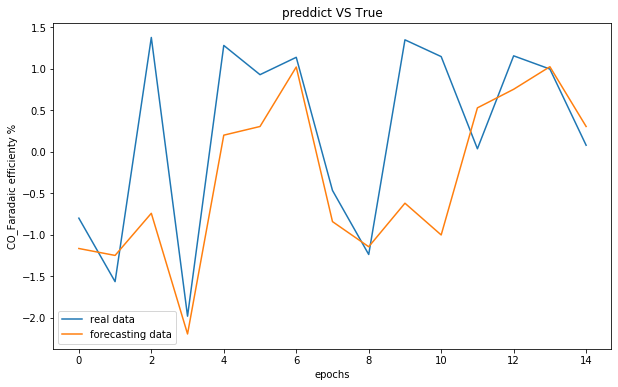

In [48]:
# 画原始数据和预测数据图
plt.figure(figsize=(10,6))
plt.plot(list(test_y), label='real data')
plt.plot(y_pred, label='forecasting data')
plt.xlabel('epochs')
plt.ylabel('CO_Faradaic efficienty %')
plt.title('preddict VS True')
plt.legend()
plt.show()

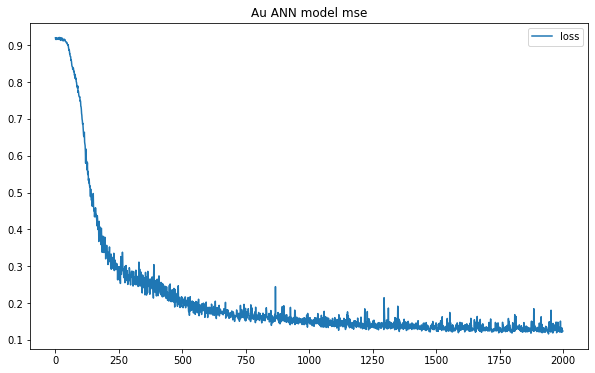

In [50]:
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'], label='loss')
#plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Au ANN model mse')
plt.legend()
plt.show()

In [10]:
classifier.save('Au_predict.h5')
score = classifier.evaluate(test_x, test_y, verbose = 2)